In [1]:
import numpy as np
import pandas as pd
from collections import defaultdict
from scipy import stats
from config import config_dict
import os
import matplotlib.mlab as mlab

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use('Cole_2018.mplstyle')

pd.options.display.max_columns=100

In [2]:
# Make directory for saving figures
if not os.path.exists('figs/s1'):
    os.makedirs('figs/s1')

# Load shank and neuron dataframes

In [3]:
df_shanks = pd.read_csv(config_dict['processed_path'] + 'df_shanks_stats.csv', index_col=0)

df_neus_raw = pd.read_csv(config_dict['processed_path'] + 'df_neus_stats.csv', index_col=0)
df_shapefr_corrs = pd.read_csv(config_dict['processed_path'] + 'df_fr_shape_corrs.csv', index_col=0)
df_shapespkt_corrs = pd.read_csv(config_dict['processed_path'] + 'df_spktime_shape_corrs.csv', index_col=0)
df_neus = df_neus_raw.merge(df_shapefr_corrs, on=['rat', 'sess', 'sh', 'clu'], how='outer')
df_neus = df_neus.merge(df_shapespkt_corrs, on=['rat', 'sess', 'sh', 'clu'], how='outer')
df_neus = df_neus[df_neus['N_spikes_burst0'] >= config_dict['analysis_N_spikes_min']]

In [4]:
df_shanks.head()

,rat,sess,sh,Fs,elec,burst_type,amp_mean,period_mean,rdsym_mean,ptsym_mean,cycling_frac,N_cycles_all,N_cycles_burst,N_seconds,corr_volt_amp_period_r,corr_volt_amp_period_p,corr_volt_amp_time_rdsym_r,corr_volt_amp_time_rdsym_p,corr_volt_amp_time_ptsym_r,corr_volt_amp_time_ptsym_p,corr_period_time_rdsym_r,corr_period_time_rdsym_p,corr_period_time_ptsym_r,corr_period_time_ptsym_p,corr_time_rdsym_time_ptsym_r,corr_time_rdsym_time_ptsym_p,mv_amp_mean,ms_period_mean
0,ec013,ec013.426,4,1250,0,0,2319.532520,161.287866,0.412290,0.414131,0.785563,11644,9362,1537.7272,-0.077456,6.156500e-14,0.040812,7.814688e-05,-0.056677,4.075107e-08,-0.078357,3.143550e-14,0.068883,2.523349e-11,-0.069632,1.533282e-11,2.319533,129.030293
1,ec013,ec013.426,4,1250,0,1,2506.020471,159.755894,0.413762,0.416971,0.229142,11644,2757,1537.7272,-0.045395,1.714016e-02,0.074978,8.125541e-05,-0.005567,7.701624e-01,-0.139330,2.006159e-13,0.089944,2.243371e-06,-0.078136,4.006003e-05,2.506020,127.804715
2,ec013,ec013.426,4,1250,0,2,2294.748565,162.577416,0.417008,0.418010,0.857648,11644,10140,1537.7272,-0.074177,7.498704e-14,0.022376,2.424323e-02,-0.069449,2.542994e-12,-0.053720,6.206877e-08,0.062979,2.190056e-10,-0.062067,3.969768e-10,2.294749,130.061933
3,ec013,ec013.426,4,1250,0,3,2596.327103,156.988942,0.434752,0.428598,0.051699,11644,633,1537.7272,0.047954,2.282801e-01,0.045272,2.553896e-01,0.083773,3.509748e-02,-0.073497,6.460276e-02,-0.005631,8.875558e-01,0.026173,5.109850e-01,2.596327,125.591153
4,ec013,ec013.426,5,1250,0,0,2200.710141,161.099577,0.412755,0.419072,0.773503,11619,9229,1537.7200,-0.068670,4.006313e-11,0.062534,1.825662e-09,-0.043223,3.271105e-05,-0.082509,2.039848e-15,0.070847,9.510113e-12,-0.067264,9.909330e-11,2.200710,128.879662


In [5]:
df_neus.head()

,rat,sess,sh,clu,fr1,fr2,type,fr_recording,N_spikes_recording,fr_burst0,fr_notburst0,N_spikes_burst0,mwu_fr_burst0_notburst_p,fr_burst1,fr_notburst1,N_spikes_burst1,mwu_fr_burst1_notburst_p,fr_burst2,fr_notburst2,N_spikes_burst2,mwu_fr_burst2_notburst_p,fr_burst3,fr_notburst3,N_spikes_burst3,mwu_fr_burst3_notburst_p,sfc_magnitude_recording,sfc_phase_recording,sfc_magnitude_cycles,sfc_phase_cycles,sfc_magnitude_cycles_hilbert,sfc_phase_cycles_hilbert,norm_fr_diff_burst0,norm_fr_diff_burst1,norm_fr_diff_burst2,norm_fr_diff_burst3,sfc_phase_cycles_2pi,burst_type,corr_cycle_fr_volt_amp_r,corr_cycle_fr_volt_amp_p,corr_cycle_fr_period_r,corr_cycle_fr_period_p,corr_cycle_fr_time_rdsym_r,corr_cycle_fr_time_rdsym_p,corr_cycle_fr_time_ptsym_r,corr_cycle_fr_time_ptsym_p,corr_burst_across_fr_volt_amp_r,corr_burst_across_fr_volt_amp_p,corr_burst_within_fr_volt_amp_avgr,corr_burst_within_fr_volt_amp_p,corr_burst_across_fr_period_r,corr_burst_across_fr_period_p,corr_burst_within_fr_period_avgr,corr_burst_within_fr_period_p,corr_burst_across_fr_time_rdsym_r,corr_burst_across_fr_time_rdsym_p,corr_burst_within_fr_time_rdsym_avgr,corr_burst_within_fr_time_rdsym_p,corr_burst_across_fr_time_ptsym_r,corr_burst_across_fr_time_ptsym_p,corr_burst_within_fr_time_ptsym_avgr,corr_burst_within_fr_time_ptsym_p,glm_cycle_fr_coef_volt_amp,glm_cycle_fr_p_volt_amp,glm_cycle_fr_coef_period,glm_cycle_fr_p_period,glm_cycle_fr_coef_time_rdsym,glm_cycle_fr_p_time_rdsym,glm_cycle_fr_coef_time_ptsym,glm_cycle_fr_p_time_ptsym,glm_cycle_fr_r2,glm_burst_fr_coef_volt_amp,glm_burst_fr_p_volt_amp,glm_burst_fr_coef_period,glm_burst_fr_p_period,glm_burst_fr_coef_time_rdsym,glm_burst_fr_p_time_rdsym,glm_burst_fr_coef_time_ptsym,glm_burst_fr_p_time_ptsym,glm_burst_fr_r2,glm_speed_fr_coef_volt_amp,glm_speed_fr_p_volt_amp,glm_speed_fr_coef_period,glm_speed_fr_p_period,glm_speed_fr_coef_time_rdsym,glm_speed_fr_p_time_rdsym,glm_speed_fr_coef_time_ptsym,glm_speed_fr_p_time_ptsym,glm_speed_fr_coef_speed,glm_speed_fr_p_speed,glm_speed_fr_r2,nonuniform_norm_spk_times_D,nonuniform_norm_spk_times_p,mwu_normtime_rdsym_p,norm_spktime_asym_mode,norm_spktime_sym_mode,mwu_trough_time_rdsym_p,trough_spike_asym_mode,trough_spike_sym_mode,pha_spike_asym_mode,pha_spike_sym_mode
0,ec013,ec013.426,4,2,0.407231,0.512286,p,0.335560,516,0.342720,0.309329,414,0.297142,0.465436,0.296954,164,0.000241,0.341970,0.296940,451,0.206365,0.402520,0.331910,32,0.324259,0.318662,-2.128263,0.304635,-1.975268,0.348779,-1.898694,0.051209,0.220992,0.070479,0.096143,4.307917,0.0,0.060267,5.352576e-09,0.021739,0.035434,0.000440,0.966030,0.018866,0.067955,0.153660,2.590812e-04,0.079430,0.000250,-0.088541,0.036031,0.084698,0.009637,-0.154874,0.000231,-0.003841,0.375174,-0.115299,0.006258,-0.006693,0.688715,0.142229,5.460317e-13,0.012663,0.522073,0.003548,0.857856,0.034744,0.080619,0.005736,0.067073,0.031544,-0.048462,0.127942,-0.030456,0.317293,0.031849,0.327942,0.015121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.215328,0.000000e+00,0.403534,0.725,0.675,0.247939,0.005,0.035,-1.727876,-2.356194
1,ec013,ec013.426,4,2,0.407231,0.512286,p,0.335560,516,0.342720,0.309329,414,0.297142,0.465436,0.296954,164,0.000241,0.341970,0.296940,451,0.206365,0.402520,0.331910,32,0.324259,0.318662,-2.128263,0.304635,-1.975268,0.348779,-1.898694,0.051209,0.220992,0.070479,0.096143,4.307917,1.0,0.064912,6.487088e-04,-0.015611,0.412564,-0.005271,0.782036,0.003736,0.844544,0.078823,4.833229e-02,0.091988,0.136333,0.021311,0.594000,-0.006265,0.892432,-0.078733,0.048589,0.026801,0.729830,0.029252,0.464315,-0.040795,0.434073,0.215148,1.496169e-06,-0.064485,0.154074,-0.015554,0.731326,0.015038,0.738705,0.009256,0.180349,0.002023,-0.045277,0.464003,-0.080949,0.168076,0.035679,0.557436,0.017735,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.215328,0.000000e+00,0.403534,0.725,0.675,0.247939,0.005,0.035,-1.727876,-2.356194
2,ec013,ec013.426,4,2,0.407231,0.512286,p,0.335560,516,0.342720,0.309329,414,0.297142,0.465436,0.296954,164,0.000241,0.341970,0.296

# A-B. Difference in SFC between waveform and phase estimates

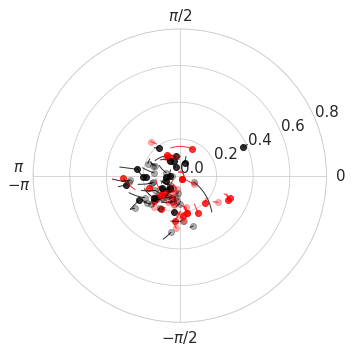

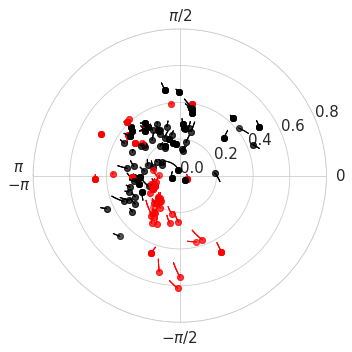

In [6]:
for t, letter in zip(['p', 'i'], ['A', 'B']):
    df_plt = df_neus[df_neus['type']==t]
    if t == 'p':
        np.random.seed(0)
        df_plt = df_plt.sample(100)

    plt.figure(figsize=(5, 5))
    ax = plt.subplot(111, polar=True)
    N_points = 100

    for i, row in df_plt.iterrows():
        mag_start = row['sfc_magnitude_cycles']
        mag_end = row['sfc_magnitude_cycles_hilbert']
        pha_start = row['sfc_phase_cycles']
        pha_end = row['sfc_phase_cycles_hilbert']

        # Just plot a dot if the phases are the same
        if pha_start == pha_end:
            plt.plot(pha_start, i, '.', color='k', ms=15, alpha=.5)
        else:
            # Color markers appropriately
            if pha_start > pha_end:
                alpha_use = .8
            else:
                alpha_use = .3
    
            if mag_start > mag_end:
                color = 'k'
            else:
                color = 'r'

            # Correct direction of arrow if necessary
            if pha_end - pha_start < -np.pi:
                pha_end = 2*np.pi + pha_end
            if pha_end - pha_start > np.pi:
                pha_end = pha_end - 2*np.pi

            # Plot the line
            plt.plot(np.linspace(pha_start, pha_end, N_points),
                     np.linspace(mag_start, mag_end, N_points), color, alpha=.8)

            # Plot a dot where it ends
            plt.plot(pha_end, mag_end, color, marker='.', alpha=alpha_use, ms=12)

    # Format the plot    
    plt.yticks([0,.2,.4,.6,.8])
    plt.xticks(np.arange(-np.pi,np.pi,np.pi/2),['$\pi$\n$-\pi$','$-\pi/2$',0,'$\pi/2$'])
    plt.ylim((0,.8))
    ax.set_thetalim(-np.pi, np.pi)
    
    plt.tight_layout()
    plt.savefig('figs/s1/{:s}.png'.format(letter))

# C-D. Waveform-hilbert SFC magnitude difference depends on preferred phase

/Users/scott/anaconda/envs/shapyspiky/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


p SpearmanrResult(correlation=0.4780168540367014, pvalue=9.913910855560588e-138)
i SpearmanrResult(correlation=0.5646762887684899, pvalue=2.3832042897672646e-40)


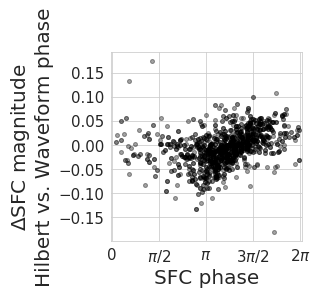

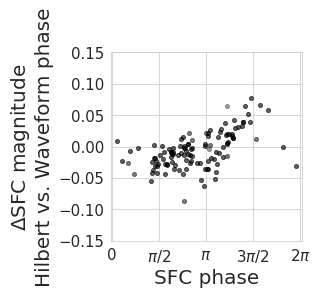

In [7]:
# Correlation between preferred phase for SFC waveform, and the change in SFC amplitude if do hilbert
for t, letter in zip(['p', 'i'], ['C', 'D']):
    df_plt = df_neus[df_neus['type']==t]
    df_plt.dropna(subset=['sfc_phase_cycles_2pi',
                          'sfc_magnitude_cycles_hilbert', 'sfc_magnitude_cycles'], inplace=True)
    
    plt.figure(figsize=(4.5,4))
    plt.plot(df_plt['sfc_phase_cycles_2pi'],
             df_plt['sfc_magnitude_cycles_hilbert'] - df_plt['sfc_magnitude_cycles'], 'k.', ms=8, alpha=.2)
    plt.xlabel('SFC phase')
    plt.ylabel('$\Delta$SFC magnitude\nHilbert vs. Waveform phase')
    plt.xticks([0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi], [0, '$\pi/2$', '$\pi$', '$3\pi/2$', '$2\pi$'])
    plt.yticks(np.arange(-.15, .16, .05))
    plt.xlim((-.02, 2*np.pi+.08))
    
    plt.tight_layout()
    plt.savefig('figs/s1/{:s}.png'.format(letter))
    
    print(t, stats.spearmanr(df_plt['sfc_phase_cycles_2pi'],
                             df_plt['sfc_magnitude_cycles_hilbert'] - df_plt['sfc_magnitude_cycles']))

# E-F. Waveform-hilbert SFC phase difference

/Users/scott/anaconda/envs/shapyspiky/lib/python3.6/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  # Remove the CWD from sys.path while we load stuff.
/Users/scott/anaconda/envs/shapyspiky/lib/python3.6/site-packages/scipy/stats/morestats.py:2391: RuntimeWarning: invalid value encountered in greater
  r_plus = np.sum((d > 0) * r, axis=0)
/Users/scott/anaconda/envs/shapyspiky/lib/python3.6/site-packages/scipy/stats/morestats.py:2392: RuntimeWarning: invalid value encountered in less
  r_minus = np.sum((d < 0) * r, axis=0)


WilcoxonResult(statistic=795532.0, pvalue=1.9404369270765296e-82)


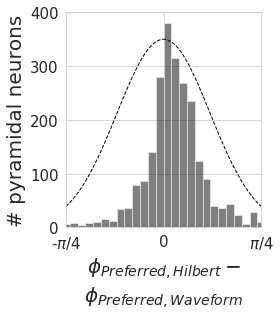

In [8]:
# Correlation between preferred phase for SFC waveform, and the change in SFC phase if do hilbert
df_neus['sfc_phase_change_hilbert'] = np.angle(np.exp(1j*(df_neus['sfc_phase_cycles_hilbert'] - df_neus['sfc_phase_cycles'])))

df_plt = df_neus[df_neus['type']=='p']
plt.figure(figsize=(4,4.5))
plt.hist(df_plt['sfc_phase_change_hilbert'], np.arange(-np.pi/2, np.pi/2, np.pi/50), color='k', alpha=.5)

# Plot null Gaussian
x_gauss = np.linspace(-np.pi/4, np.pi/4, 100)
y_gauss = mlab.normpdf(x_gauss, 0, np.std(df_plt['sfc_phase_change_hilbert']))
y_gauss = y_gauss * 350 / np.max(y_gauss)
plt.plot(x_gauss, y_gauss, 'k--')

plt.ylabel('# pyramidal neurons')
plt.xlabel('$\phi_{Preferred, Hilbert} -$\n$\phi_{Preferred, Waveform}$')
plt.yticks(np.arange(0,401, 100))
plt.xticks([-np.pi/2, -np.pi/4, 0, np.pi/4, np.pi/2], ['-$\pi/2$', '-$\pi/4$', 0, '$\pi/4$', '$\pi/2$'])
plt.xlim((-np.pi/4, np.pi/4))
plt.tight_layout()
plt.savefig('figs/s1/E.png')
print(stats.wilcoxon(df_plt['sfc_phase_change_hilbert']))

SpearmanrResult(correlation=0.4375372484741803, pvalue=4.4955291090102216e-23)


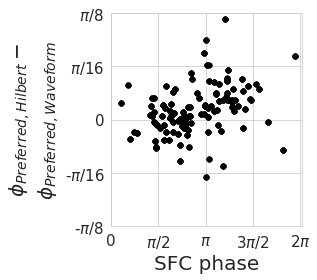

In [9]:
df_plt = df_neus[df_neus['type']=='i']    
plt.figure(figsize=(4.5,4))
plt.plot(df_plt['sfc_phase_cycles_2pi'], df_plt['sfc_phase_change_hilbert'], 'k.')
plt.xlabel('SFC phase')
plt.ylabel('$\phi_{Preferred, Hilbert} -$\n$\phi_{Preferred, Waveform}$')
plt.xticks([0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi], [0, '$\pi/2$', '$\pi$', '$3\pi/2$', '$2\pi$'])
plt.yticks([-np.pi/8, -np.pi/16, 0, np.pi/16, np.pi/8], ['-$\pi/8$', '-$\pi/16$', 0, '$\pi/16$', '$\pi/8$'])
plt.ylim((-np.pi/8, np.pi/8))
plt.xlim((0, 2*np.pi+.08))
plt.tight_layout()
plt.savefig('figs/s1/F.png')
print(stats.spearmanr(df_plt['sfc_phase_cycles_2pi'], df_plt['sfc_phase_change_hilbert']))

# G-H. SFC for cycles vs recording

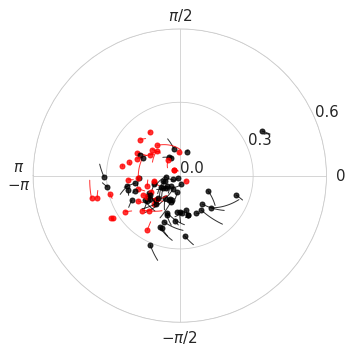

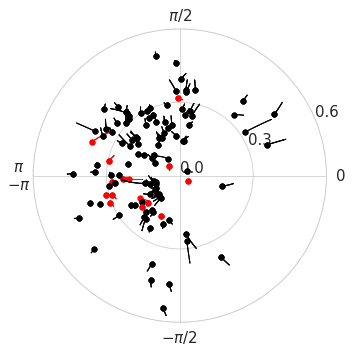

In [10]:
for t, letter in zip(['p', 'i'], ['G', 'H']):
    df_plt = df_neus[df_neus['type']==t]
    if t == 'p':
        np.random.seed(0)
        df_plt = df_plt.sample(100)
    

    plt.figure(figsize=(5,5))
    ax = plt.subplot(111, polar=True)
    N_points = 100

    for i, row in df_plt.iterrows():
        mag_start = row['sfc_magnitude_cycles']
        mag_end = row['sfc_magnitude_recording']
        pha_start = row['sfc_phase_cycles']
        pha_end = row['sfc_phase_recording']

        # Just plot a dot if the phases are the same
        if pha_start == pha_end:
            plt.plot(pha_start, i, '.', color='k', ms=15, alpha=.5)
        else:
            if mag_start > mag_end:
                color = 'k'
            else:
                color = 'r'

            # Correct direction of arrow if necessary
            if pha_end - pha_start < -np.pi:
                pha_end = 2*np.pi + pha_end
            if pha_end - pha_start > np.pi:
                pha_end = pha_end - 2*np.pi

            # Plot the line
            plt.plot(np.linspace(pha_start, pha_end, N_points),
                     np.linspace(mag_start, mag_end, N_points), color, alpha=.8)

            # Plot a dot where it ends
            plt.plot(pha_end, mag_end, color, marker='.', alpha=.8, ms=10)

    # Format the plot    
    plt.yticks([0,.3,.6])
    plt.xticks(np.arange(-np.pi,np.pi,np.pi/2),['$\pi$\n$-\pi$','$-\pi/2$',0,'$\pi/2$'])
    plt.ylim((0,.6))
    ax.set_thetalim(-np.pi, np.pi)
                     
    plt.tight_layout()
    plt.savefig('figs/s1/{:s}.png'.format(letter))

# I. Distribution of SFC magnitude differences between methods

/Users/scott/anaconda/envs/shapyspiky/lib/python3.6/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  # Remove the CWD from sys.path while we load stuff.


WilcoxonResult(statistic=1144140.0, pvalue=1.1528666208966397e-112)


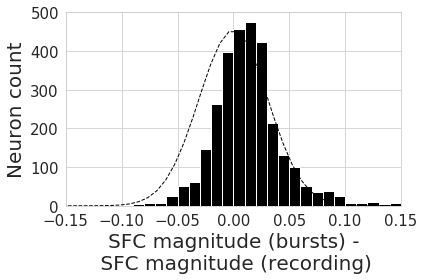

In [11]:
mag_diffs = df_neus['sfc_magnitude_cycles'] - df_neus['sfc_magnitude_recording']

plt.figure(figsize=(6, 4))
plt.hist(mag_diffs, bins=np.linspace(-.15, .15, 31), color='k')
plt.xlim(-.15, .15)
plt.ylim(0, 500)

# Plot null Gaussian
x_gauss = np.linspace(-.4, .4, 100)
y_gauss = mlab.normpdf(x_gauss, 0, np.std(mag_diffs))
y_gauss = y_gauss * 450 / np.max(y_gauss)
plt.plot(x_gauss, y_gauss, 'k--')
plt.xlabel('SFC magnitude (bursts) -\n SFC magnitude (recording)')
plt.ylabel('Neuron count')

plt.tight_layout()
plt.savefig('figs/s1/I.png')

print(stats.wilcoxon(mag_diffs))